# Coeficiente de Correlação de Pearson
Também conhecida como correlação liner, ela mede o quanto duas variáveis estão se relacionando.


# Como se calcula a correlação?

<img src='correlacao.jpg'>

In [72]:
x = [1, 2, 2, 3]
y = [1, 2, 3, 6]

#1º Calcular a media dos valores x e y
x_media = np.mean(x)
y_media = np.mean(y)

#2º Calcular a variancia de x e y para achar o desvio padrão
vx = np.var(x, ddof=1)
vy = np.var(y, ddof=1)

#3º desvio padrão de x e y (igual raiz da variancia)    
Sx = np.sqrt(vx)
Sy = np.sqrt(vy)


### Com a média e desvio padrão em mãos calculamos o coeficiente de correlação
<img src='coeficiente de correlacao.jpg'><br>
Onde devemos calcular para cada ponto (x, y)

O valor de r deve compreender sempre: -1 <= r <= 1 onde:
    
    * Se r = 1 : correlação positiva muito forte 
    (Nossos pontos (x, y) estão perfeitamente sobre uma reta crescente)
    
    * Se r = 0 : Os pontos formam uma nuvem no gráfico eos pontos nao tem correlação.
    
    * Se r = -1: correlação negativa muito forte 
    (Nossos pontos (x, y) estão perfeitamente sobre uma reta decrescente)

### Vamos calcular o CC na mão 


In [73]:
# 1º Vamos calcular os scores Zx e Zy para cada ponto:
scores = []
for i in range(len(x)):
    scoreZ = (((x[i] - x_media)/Sx) * ((y[i] - y_media)/Sy))
    scores.append(scoreZ)
    
# 2º Agora podemos calcular o coeficiente decorrelação:
r = (1/(len(x)-1)) * np.sum(scores)

print(f'O Coeficiente de correlação é: {r:.2f}')

O Coeficiente de correlação é: 0.94


### Toooodo esse trabalho foi pra entendermos a matemática por trás do coeficiente de correlação, podemos calcular tudo isso somente usando .CORR()
<img src='qodio.jpg'>

In [74]:
# Transformando nossos conjuntos de dados x e y numa tabela com pandas
# primeiro criamos uma lista de tuplas com cada ponto usando ZIP()
c = zip(x,y)
lista = list(c)
print(lista)
# agora transformamos nossa lista em uma tabela
df = pd.DataFrame(lista, columns = ['x', 'y'])
print(df)
# coma tabela em mão podemos calcular a correlaçao entre x e y
print(df[['x', 'y']].corr())

[(1, 1), (2, 2), (2, 3), (3, 6)]
   x  y
0  1  1
1  2  2
2  2  3
3  3  6
          x         y
x  1.000000  0.944911
y  0.944911  1.000000


# Bibliotecas

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

# Coleta de dados

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')
df

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,...,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,...,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,...,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,...,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


# Exploração de dados

In [77]:
df.isnull().sum().sort_values(ascending=False)

furto_bicicleta               276
roubo_bicicleta               276
cmba                          180
posse_drogas                  180
trafico_drogas                180
apreensao_drogas_sem_autor    180
apf                           180
aaapai                        180
cmp                           180
furto_celular                 144
sequestro_relampago           144
extorsao                      144
furto_coletivo                144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estelionato                   144
pol_militares_mortos_serv     144
pol_civis_mortos_serv         144
estupro                       144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
registro_ocorrencias           96
lesao_corp_morte               96
sequestro                      96
ameaca                         96
lesao_corp_culposa             96
hom_culposo                    84
hom_por_interv

In [78]:
# vamos ver qntd de nulos por ano
df.set_index('vano').isnull().sum(level=0)/df.shape[0]

C:\Users\devda\AppData\Local\Temp\ipykernel_29596\22127191.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df.set_index('vano').isnull().sum(level=0)/df.shape[0]


,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,
1991,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1992,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1993,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1994,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1995,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1996,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1997,0.0,0.0,0.034884,0.0,0.034884,0.0,0.0,0.034884,0.034884,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1998,0.0,0.0,0.034884,0.0,0.000000,0.0,0.0,0.034884,0.000000,0.034884,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.034884,0.0
1999,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034884,0.000000,0.000000,...,0.034884,0.0,0.034884,0.034884,0.034884,0.0,0.0,0.0,0.000000,0.0


In [79]:
# de 2000 pra tras nao tem dados, vamos excluir esses anos
df= df.drop(df[df.vano <2000].index, axis=0)

In [80]:
# verificando nulos novamente
df.isnull().sum().sort_values(ascending=False)

furto_bicicleta               168
roubo_bicicleta               168
aaapai                         72
apf                            72
posse_drogas                   72
trafico_drogas                 72
apreensao_drogas_sem_autor     72
cmba                           72
cmp                            72
sequestro_relampago            36
furto_coletivo                 36
estelionato                    36
roubo_apos_saque               36
roubo_conducao_saque           36
roubo_cx_eletronico            36
furto_celular                  36
estupro                        36
pol_militares_mortos_serv      36
pol_civis_mortos_serv          36
extorsao                       36
pessoas_desaparecidas          24
encontro_ossada                24
sequestro                       0
recuperacao_veiculos            0
ameaca                          0
encontro_cadaver                0
apreensao_drogas                0
indicador_letalidade            0
indicador_roubo_rua             0
indicador_roub

In [81]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
108,2000,1,547,11.0,13,37.0,190,6254,NaN,264.0,...,NaN,71,NaN,NaN,NaN,608,1911,2165,33870.0,3
109,2000,2,500,6.0,11,32.0,202,5983,NaN,252.0,...,NaN,79,NaN,NaN,NaN,549,2367,2257,36131.0,3
110,2000,3,572,12.0,12,25.0,241,5891,NaN,202.0,...,NaN,99,NaN,NaN,NaN,621,2276,2503,37426.0,3
111,2000,4,546,7.0,19,22.0,208,5594,NaN,192.0,...,NaN,96,NaN,NaN,NaN,594,2146,2749,35786.0,3
112,2000,5,577,7.0,13,30.0,193,5466,NaN,248.0,...,NaN,82,NaN,NaN,NaN,627,2426,2757,37301.0,3


# Vamos pra correlação!

A correlação entre variáveis é medida entre:

    *  1: relação muito forte
    * -1: relação muito fraca

In [82]:
lista = ['hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo']

In [83]:
# tabela de correlação
df[lista].corr()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo
hom_doloso,1.000000,0.329965,0.430936,0.158744,-0.375459,-0.008021,-0.659631,0.432101,0.049973,0.098579,0.664381,0.171100
lesao_corp_morte,0.329965,1.000000,0.180286,0.032358,-0.210609,-0.085066,-0.210696,0.126650,0.110438,0.053216,0.158611,0.056086
latrocinio,0.430936,0.180286,1.000000,0.102635,-0.093539,-0.195827,-0.251415,0.200331,-0.099486,0.097272,0.216622,0.279501
hom_por_interv_policial,0.158744,0.032358,0.102635,1.000000,0.208111,-0.458007,-0.334494,-0.111377,-0.623358,-0.077829,0.152603,0.487985
tentat_hom,-0.375459,-0.210609,-0.093539,0.208111,1.000000,0.039201,0.570042,-0.620456,-0.461521,0.404829,-0.368116,0.525835
lesao_corp_dolosa,-0.008021,-0.085066,-0.195827,-0.458007,0.039201,1.000000,0.230467,0.134109,0.408797,0.043015,0.180214,-0.494230
estupro,-0.659631,-0.210696,-0.251415,-0.334494,0.570042,0.230467,1.000000,-0.406848,0.162602,0.189508,-0.619144,0.045838
hom_culposo,0.432101,0.126650,0.200331,-0.111377,-0.620456,0.134109,-0.406848,1.000000,0.346867,-0.294751,0.338178,-0.349595
lesao_corp_culposa,0.049973,0.110438,-0.099486,-0.623358,-0.461521,0.408797,0.162602,0.346867,1.000000,-0.052448,0.025612,-0.601089
roubo_comercio,0.098579,0.053216,0.097272,-0.077829,0.404829,0.043015,0.189508,-0.294751,-0.052448,1.000000,0.112607,0.442170


### Correlação positiva = 1 absoluto

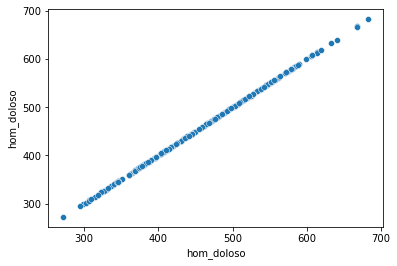

In [87]:
# o grafico abaixodescreve uma correlacao = 1, ou seja, uma correlação perfeita onde os pontos formam
# uma reta e todos os pontos passam por ela. mas claro estamos comparando
# uma variavel com ela mesma. mas so pra exemplificar.
sns.scatterplot(x='hom_doloso', y='hom_doloso', data=df)
plt.show()

### Correlação = 0 (Sem correlação)

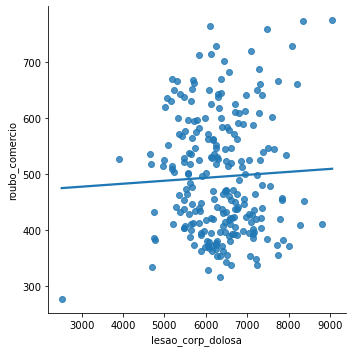

In [88]:

sns.lmplot(x='lesao_corp_dolosa', y='roubo_comercio', data=df, ci=None)

### Correlação negativa (Enquanto x sobe y cai)

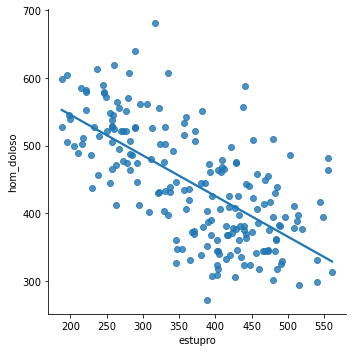

In [89]:
sns.lmplot(x='estupro', y='hom_doloso', data=df, ci=None)

#### Resumo: Podemos usar o coeficiente de correlação entre as variaveis que temos disponíveis com a nossa variável alvo, ou seja aquela que queremos descobrir, caso a correlação for zero ou proxima de zero, para algoritimos de regressão, podemos eliminar aquela variável pois ela não vai explicar em nada a nossa análise.